# Library and Data Imports and Standardization

In [1]:
# Make the imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn as sk

# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Import ordinal encoder
from sklearn.preprocessing import OrdinalEncoder

# Import Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, make_scorer, r2_score, root_mean_squared_error

# Import train test split
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score
from pprint import pprint

# Import Random Forest Regressor and Classifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# Import time
import time

# Import Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV

# Import confusion matrix
from sklearn.metrics import confusion_matrix

# Import kfold
from sklearn.model_selection import KFold

# Import cross val score
from sklearn.model_selection import cross_val_score

# Import math
import math

# Import log2
from math import log2

# Import classification report
from sklearn.metrics import classification_report

np.random.seed(42)

# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# path = '/content/drive/My Drive/Online MSDS/MOD C2/Political Polarization/data/'
path = 'data/'
convabuse_filename = 'convabuse_final.csv'
dghs_filename = 'dynamically_generated_hate_speech_dataset_final.csv'
oaa_filename = 'online_abusive_attacks_final.csv'
us2020hs_filename = 'us_elections_2020_hate_speech_final.csv'
mlma_hate_speech_filename = 'MLMA_hate_speech_final.csv'

In [3]:
# Import the datasets
convabuse = pd.read_csv(f'{path}{convabuse_filename}')
dynamically_generated_hate_speech = pd.read_csv(f'{path}{dghs_filename}')
online_abusive_attacks = pd.read_csv(f'{path}{oaa_filename}')
us_elections_2020_hate_speech = pd.read_csv(f'{path}{us2020hs_filename}')
mlma_hate_speech = pd.read_csv(f'{path}{mlma_hate_speech_filename}')
mlma_hate_speech_sample = mlma_hate_speech.sample(frac=0.3, random_state=42)

In [4]:
convabuse.head()

,annotator_id,bot,generalised,individual,system,explicit,implicit,abuse_level,target_groups
0,2,1,0,0,0,0,0,0,0
1,7,1,0,0,0,0,0,0,0
2,5,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0
4,3,1,0,0,0,0,0,0,0


In [5]:
convabuse_X = convabuse.drop("abuse_level", axis=1)
convabuse_y = convabuse["abuse_level"]

In [6]:
dynamically_generated_hate_speech.head()

,label,type,annotator,target_groups,original
0,1.0,-1,4,0,1
1,1.0,-1,9,1,1
2,1.0,-1,16,1,0
3,1.0,0,2,0,1
4,1.0,-1,15,0,1


In [7]:
dghs_X = dynamically_generated_hate_speech.drop("label", axis=1)
dghs_y = dynamically_generated_hate_speech["label"]

In [8]:
online_abusive_attacks.head()

,followers_count,friends_count,verified,statuses_count,women,love,news,account,feminist,official,follow,products,tweets,womens,Toxicity
0,39632.0,15271.0,0,71848.0,0,0,0,0,0,0,0,0,0,0,0.0
1,20606.0,9472.0,0,167382.0,0,0,0,0,0,0,0,0,0,0,13.0
2,20445.0,9396.0,0,165314.0,0,0,0,0,0,0,0,0,0,0,45.0
3,20506.0,9430.0,0,166164.0,0,0,0,0,0,0,0,0,0,0,49.0
4,20583.0,9469.0,0,167488.0,0,0,0,0,0,0,0,0,0,0,7.0


In [9]:
online_abusive_attacks_X = online_abusive_attacks.drop("Toxicity", axis=1)
online_abusive_attacks_y = online_abusive_attacks["Toxicity"]

In [10]:
us_elections_2020_hate_speech.head()

,Trump,Biden,West,HOF
0,-1,0,1,1
1,1,0,1,1
2,1,0,1,1
3,-1,0,1,1
4,0,-1,1,1


In [11]:
us2020hs_X = us_elections_2020_hate_speech.drop("HOF", axis=1)
us2020hs_y = us_elections_2020_hate_speech["HOF"]

In [12]:
mlma_hate_speech.head()

,shock_annotator_sentiment,anger_annotator_sentiment,confusion_annotator_sentiment,sadness_annotator_sentiment,indifference_annotator_sentiment,disgust_annotator_sentiment,fear_annotator_sentiment,implicit,explicit,Abusive,Not Abusive,Very Abusive,Very Strongly Abusive,target_groups
0,1,0,0,0,0,0,0,1,0,0,1,1,0,1
1,0,1,1,1,1,1,0,1,0,1,0,0,0,0
2,0,0,0,0,1,0,0,1,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,1,0,1,0,0,1
4,0,0,0,0,1,0,0,1,0,0,1,0,0,1


In [13]:
mlma_hate_speech_X = mlma_hate_speech.drop("target_groups", axis=1)
mlma_hate_speech_y = mlma_hate_speech["target_groups"]
mlma_hate_speech_X_sample = mlma_hate_speech_sample.drop("target_groups", axis=1)
mlma_hate_speech_y_sample = mlma_hate_speech_sample["target_groups"]

In [14]:
# Implement KFold
convabuse_kf = KFold(n_splits=5, shuffle=True, random_state=42)
dghs_kf = KFold(n_splits=5, shuffle=True, random_state=42)
online_abusive_attacks_kf = KFold(n_splits=5, shuffle=True, random_state=42)
us2020hs_kf = KFold(n_splits=5, shuffle=True, random_state=42)
mlma_hate_speech_kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Linear Modeling

In [15]:
# Get only the numeric features for each dataset
convabuse_X_numeric = convabuse_X.select_dtypes(include=np.number)
dghs_X_numeric = dghs_X.select_dtypes(include=np.number)
online_abusive_attacks_X_numeric = online_abusive_attacks_X.select_dtypes(include=np.number)
us2020hs_X_numeric = us2020hs_X.select_dtypes(include=np.number)
mlma_hate_speech_X_numeric = mlma_hate_speech_X.select_dtypes(include=np.number)
mlma_hate_speech_X_numeric_sample = mlma_hate_speech_X_sample.select_dtypes(include=np.number)

In [16]:
# Use standard scaler on the Convabuse X data
convabuse_scaler = StandardScaler()
convabuse_X_scaled = convabuse_scaler.fit_transform(convabuse_X_numeric)
convabuse_X_scaled = pd.DataFrame(convabuse_X_scaled, columns=convabuse_X_numeric.columns)

In [17]:
# Use standard scaler on the Dynamically Generated Hate Speech X data
dghs_scaler = StandardScaler()
dghs_X_scaled = dghs_scaler.fit_transform(dghs_X_numeric)
dghs_X_scaled = pd.DataFrame(dghs_X_scaled, columns=dghs_X_numeric.columns)

In [18]:
# Use standard scaler on the online abusive attacks X data
oaa_scaler = StandardScaler()
online_abusive_attacks_X_scaled = oaa_scaler.fit_transform(online_abusive_attacks_X_numeric)
online_abusive_attacks_X_scaled = pd.DataFrame(online_abusive_attacks_X_scaled, columns=online_abusive_attacks_X_numeric.columns)

In [19]:
# Use standard scaler on the US elections 2020 hate speech X data
us2020hs_scaler = StandardScaler()
us2020hs_X_scaled = us2020hs_scaler.fit_transform(us2020hs_X_numeric)
us2020hs_X_scaled = pd.DataFrame(us2020hs_X_scaled, columns=us2020hs_X_numeric.columns)

In [20]:
# Use standard scaler on the MLMA hate speech X data
mlma_hate_speech_scaler = StandardScaler()
mlma_hate_speech_X_scaled = mlma_hate_speech_scaler.fit_transform(mlma_hate_speech_X_numeric)
mlma_hate_speech_X_scaled = pd.DataFrame(mlma_hate_speech_X_scaled, columns=mlma_hate_speech_X_numeric.columns)

In [21]:
# Use standard scaler on the MLMA hate speech X sample data
mlma_hate_speech_sample_scaler = StandardScaler()
mlma_hate_speech_X_sample_scaled = mlma_hate_speech_sample_scaler.fit_transform(mlma_hate_speech_X_numeric_sample)
mlma_hate_speech_X_sample_scaled = pd.DataFrame(mlma_hate_speech_X_sample_scaled, columns=mlma_hate_speech_X_numeric_sample.columns)

In [22]:
for columns in [convabuse_X_numeric.columns, dghs_X_numeric.columns, online_abusive_attacks_X_numeric.columns, us2020hs_X_numeric.columns, mlma_hate_speech_X_numeric.columns]:
  print(columns)

Index(['annotator_id', 'bot', 'generalised', 'individual', 'system',
       'explicit', 'implicit', 'target_groups'],
      dtype='object')
Index(['type', 'annotator', 'target_groups', 'original'], dtype='object')
Index(['followers_count', 'friends_count', 'verified', 'statuses_count',
       'women', 'love', 'news', 'account', 'feminist', 'official', 'follow',
       'products', 'tweets', 'womens'],
      dtype='object')
Index(['Trump', 'Biden', 'West'], dtype='object')
Index(['shock_annotator_sentiment', 'anger_annotator_sentiment',
       'confusion_annotator_sentiment', 'sadness_annotator_sentiment',
       'indifference_annotator_sentiment', 'disgust_annotator_sentiment',
       'fear_annotator_sentiment', 'implicit', 'explicit', 'Abusive',
       'Not Abusive', 'Very Abusive', 'Very Strongly Abusive'],
      dtype='object')


In [23]:
# Train test split for each dataset
convabuse_X_train, convabuse_X_test, convabuse_y_train, convabuse_y_test = train_test_split(convabuse_X_scaled, convabuse_y, test_size=0.2, random_state=42)
dghs_X_train, dghs_X_test, dghs_y_train, dghs_y_test = train_test_split(dghs_X_scaled, dghs_y, test_size=0.2, random_state=42)
online_abusive_attacks_X_train, online_abusive_attacks_X_test, online_abusive_attacks_y_train, online_abusive_attacks_y_test = train_test_split(online_abusive_attacks_X_scaled, online_abusive_attacks_y, test_size=0.2, random_state=42)
us2020hs_X_train, us2020hs_X_test, us2020hs_y_train, us2020hs_y_test = train_test_split(us2020hs_X_scaled, us2020hs_y, test_size=0.2, random_state=42)
mlma_hate_speech_X_train, mlma_hate_speech_X_test, mlma_hate_speech_y_train, mlma_hate_speech_y_test = train_test_split(mlma_hate_speech_X_scaled, mlma_hate_speech_y, test_size=0.2, random_state=42)
mlma_hate_speech_X_train_sample, mlma_hate_speech_X_test_sample, mlma_hate_speech_y_train_sample, mlma_hate_speech_y_test_sample = train_test_split(mlma_hate_speech_X_sample_scaled, mlma_hate_speech_y_sample, test_size=0.2, random_state=42)

In [24]:
# Get the length of each dataset
convabuse_length = len(convabuse_X_train)
dghs_length = len(dghs_X_train)
online_abusive_attacks_length = len(online_abusive_attacks_X_train)
us2020hs_length = len(us2020hs_X_train)
mlma_hate_speech_length = len(mlma_hate_speech_X_train)
mlma_hate_speech_sample_length = len(mlma_hate_speech_X_train_sample)

In [25]:
convabuse_log2 = math.ceil(log2(convabuse_length))
convabuse_1_percent = math.ceil(convabuse_length * 0.01)
convabuse_length, convabuse_log2, convabuse_1_percent

(20124, 15, 202)

In [26]:
dghs_log2 = math.ceil(log2(dghs_length))
dghs_1_percent = math.ceil(dghs_length * 0.01)
dghs_length, dghs_log2, dghs_1_percent

(30350, 15, 304)

In [27]:
online_abusive_attacks_log2 = math.ceil(log2(online_abusive_attacks_length))
online_abusive_attacks_1_percent = math.ceil(online_abusive_attacks_length * 0.01)
online_abusive_attacks_length, online_abusive_attacks_log2, online_abusive_attacks_1_percent

(1866, 11, 19)

In [28]:
us2020hs_log2 = math.ceil(log2(us2020hs_length))
us2020hs_1_percent = math.ceil(us2020hs_length * 0.01)
us2020hs_length, us2020hs_log2, us2020hs_1_percent

(4222, 13, 43)

In [29]:
mlma_hate_speech_log2 = math.ceil(log2(mlma_hate_speech_length))
mlma_hate_speech_1_percent = math.ceil(mlma_hate_speech_length * 0.01)
mlma_hate_speech_length, mlma_hate_speech_log2, mlma_hate_speech_1_percent

(14660, 14, 147)

In [30]:
mlma_hate_speech_sample_log2 = math.ceil(log2(mlma_hate_speech_sample_length))
mlma_hate_speech_sample_1_percent = math.ceil(mlma_hate_speech_sample_length * 0.01)
mlma_hate_speech_sample_length, mlma_hate_speech_sample_log2, mlma_hate_speech_sample_1_percent

(4398, 13, 44)

In [31]:
rf_regression_results_list = []

In [32]:
rf_classification_results_list = []

## Convabuse Decision Tree

In [33]:
convabuse_y_test.value_counts()

abuse_level
1    1039
0    1021
4    1019
2     977
3     975
Name: count, dtype: int64

In [34]:
convabuse_1_percent

202

In [35]:
# Random Forest Classifier pipeline for Convabuse dataset
convabuse_rf_pipeline = Pipeline([
    ('rf_classifier', RandomForestClassifier(random_state=42))
])

# Set the parameters for Randomized Search for Random Forest Classifier on the Convabuse dataset
convabuse_rf_param_grid = {
    'rf_classifier__n_estimators': range(1000),
    'rf_classifier__max_depth': range(1, convabuse_log2),
    'rf_classifier__min_samples_split': [convabuse_1_percent * i for i in range(2, 6)],
    'rf_classifier__min_samples_leaf': [convabuse_1_percent * i for i in range(1, 6)],
    'rf_classifier__criterion': ['gini']
}

In [36]:
start_time = time.time()
convabuse_class_scorer = make_scorer(accuracy_score, greater_is_better=True)

convabuse_rf_random_search = RandomizedSearchCV(convabuse_rf_pipeline,
                                                   param_distributions=convabuse_rf_param_grid,
                                                   n_iter=10,
                                                   cv=convabuse_kf,
                                                   scoring=convabuse_class_scorer,
                                                   random_state=42)
convabuse_rf_random_search.fit(convabuse_X_train, convabuse_y_train)
end_time = time.time()
print("Best parameters for Convabuse Random Forest Classifier:", convabuse_rf_random_search.best_params_)
print("Best score for Convabuse Random Forest Classifier:", convabuse_rf_random_search.best_score_)
print("Time taken for Convabuse Random Forest Classifier Randomized Search:", end_time - start_time)

Best parameters for Convabuse Random Forest Classifier: {'rf_classifier__n_estimators': 958, 'rf_classifier__min_samples_split': 606, 'rf_classifier__min_samples_leaf': 202, 'rf_classifier__max_depth': 7, 'rf_classifier__criterion': 'gini'}
Best score for Convabuse Random Forest Classifier: 0.6102660434906092
Time taken for Convabuse Random Forest Classifier Randomized Search: 73.74647378921509


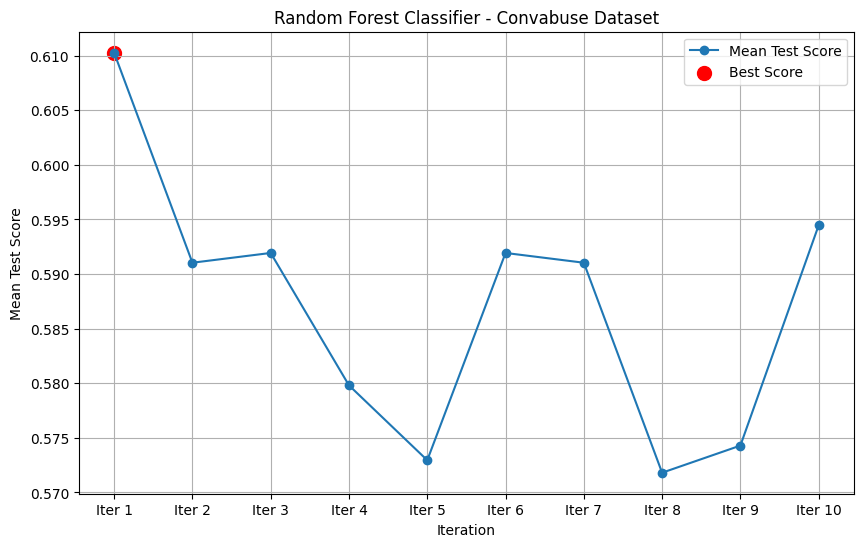

In [37]:
# Plot the accuracy scores for the Random Forest Classifier on the US Accidents dataset for all iterations
plt.figure(figsize=(10, 6))
plt.plot(convabuse_rf_random_search.cv_results_['mean_test_score'], marker='o', label='Mean Test Score')

# Plot the best score as a red x
convabuse_rf_best_score_index = np.argmax(convabuse_rf_random_search.cv_results_['mean_test_score'])
plt.scatter(convabuse_rf_best_score_index, convabuse_rf_random_search.cv_results_['mean_test_score'][convabuse_rf_best_score_index], color='red', s=100, label='Best Score')

plt.title('Random Forest Classifier - Convabuse Dataset')
plt.xlabel('Iteration')
plt.ylabel('Mean Test Score')
plt.xticks(range(len(convabuse_rf_random_search.cv_results_['mean_test_score'])),
           [f"Iter {i+1}" for i in range(len(convabuse_rf_random_search.cv_results_['mean_test_score']))])
plt.legend()
plt.grid()
plt.show()

In [38]:
# Predict on the test set
convabuse_rf_y_pred = convabuse_rf_random_search.predict(convabuse_X_test)

In [39]:
# Evaluate the model
convabuse_rf_accuracy = accuracy_score(convabuse_y_test, convabuse_rf_y_pred)
convabuse_rf_f1 = f1_score(convabuse_y_test, convabuse_rf_y_pred, average='weighted')

print("Convabuse Random Forest Classifier:")
print(f"Best Parameters: {convabuse_rf_random_search.best_params_}")
print(f"Accuracy: {convabuse_rf_accuracy:.4f}")
print(f"F1 Score: {convabuse_rf_f1:.4f}")

Convabuse Random Forest Classifier:
Best Parameters: {'rf_classifier__n_estimators': 958, 'rf_classifier__min_samples_split': 606, 'rf_classifier__min_samples_leaf': 202, 'rf_classifier__max_depth': 7, 'rf_classifier__criterion': 'gini'}
Accuracy: 0.6196
F1 Score: 0.6202


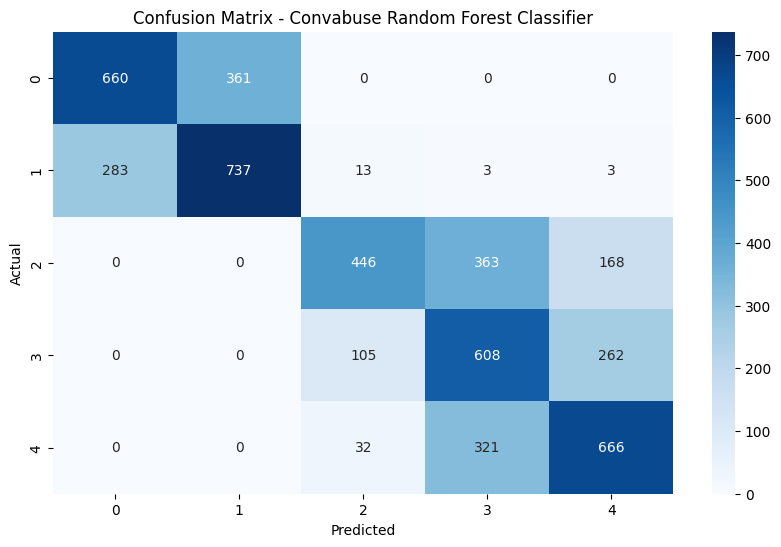

In [40]:
# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(convabuse_y_test, convabuse_rf_y_pred, rownames=['Actual'], colnames=['Predicted']), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Convabuse Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [41]:
# Generate a classification report for the Random Forest Classifier on the Convabuse dataset
convabuse_rf_report = classification_report(convabuse_y_test, convabuse_rf_y_pred)
print("Classification Report for Convabuse Random Forest Classifier:")
print(convabuse_rf_report)

Classification Report for Convabuse Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.70      0.65      0.67      1021
           1       0.67      0.71      0.69      1039
           2       0.75      0.46      0.57       977
           3       0.47      0.62      0.54       975
           4       0.61      0.65      0.63      1019

    accuracy                           0.62      5031
   macro avg       0.64      0.62      0.62      5031
weighted avg       0.64      0.62      0.62      5031



In [42]:
# Append details to the results list
rf_classification_results_list.append((
    "Random Forest",
    "Convabuse",
    "NA",
    "NA",
    convabuse_rf_accuracy,
    convabuse_rf_f1,
    0.0,
    convabuse_rf_random_search.best_params_
))

## Dynamically Generated Hate Speech Decision Tree

In [43]:
dghs_y_test.value_counts()

label
1.0    3800
0.0    3788
Name: count, dtype: int64

In [44]:
# Random Forest Classifier pipeline for DGHS dataset
dghs_rf_pipeline = Pipeline([
    ('rf_classifier', RandomForestClassifier(random_state=42))
])

# Set the parameters for Randomized Search for Random Forest Classifier on the DGHS dataset
dghs_rf_param_grid = {
    'rf_classifier__n_estimators': range(1000),
    'rf_classifier__max_depth': range(1, dghs_log2),
    'rf_classifier__min_samples_split': [dghs_1_percent * i for i in range(2, 6)],
    'rf_classifier__min_samples_leaf': [dghs_1_percent * i for i in range(1, 6)],
    'rf_classifier__criterion': ['gini', 'entropy']
}

In [45]:
start_time = time.time()
dghs_class_scorer = make_scorer(accuracy_score, greater_is_better=True)

dghs_rf_random_search = RandomizedSearchCV(dghs_rf_pipeline,
                                           param_distributions=dghs_rf_param_grid,
                                           n_iter=10,
                                           cv=dghs_kf,
                                           scoring=dghs_class_scorer,
                                           random_state=42)
dghs_rf_random_search.fit(dghs_X_train, dghs_y_train)
end_time = time.time()
print("Best parameters for Dynamically Generated Hate Speech Random Forest Classifier:", dghs_rf_random_search.best_params_)
print("Best score for Dynamically Generated Hate Speech Random Forest Classifier:", dghs_rf_random_search.best_score_)
print("Time taken for Dynamically Generated Hate Speech Random Forest Classifier Randomized Search:", end_time - start_time)

Best parameters for Dynamically Generated Hate Speech Random Forest Classifier: {'rf_classifier__n_estimators': 958, 'rf_classifier__min_samples_split': 912, 'rf_classifier__min_samples_leaf': 304, 'rf_classifier__max_depth': 7, 'rf_classifier__criterion': 'gini'}
Best score for Dynamically Generated Hate Speech Random Forest Classifier: 0.8487644151565075
Time taken for Dynamically Generated Hate Speech Random Forest Classifier Randomized Search: 91.86372208595276


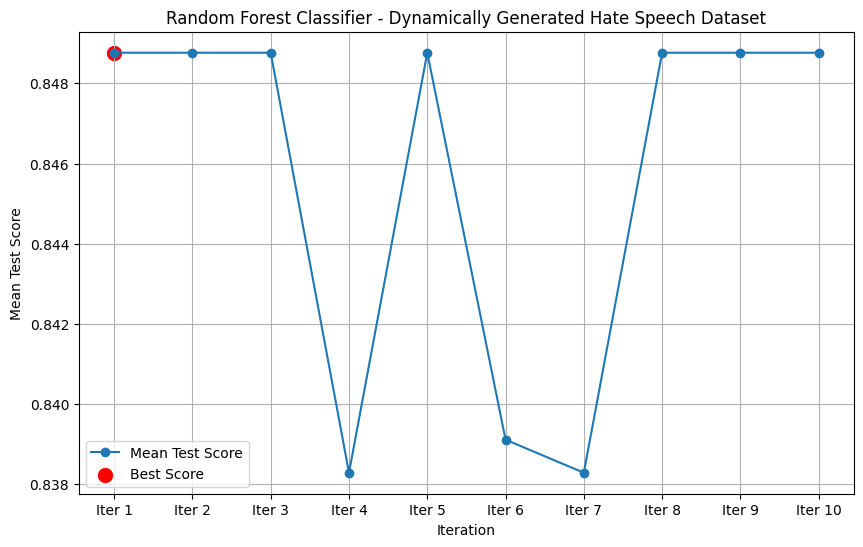

In [46]:
# Plot the accuracy scores for the Random Forest Classifier on the US Accidents dataset for all iterations
plt.figure(figsize=(10, 6))
plt.plot(dghs_rf_random_search.cv_results_['mean_test_score'], marker='o', label='Mean Test Score')

# Plot the best score as a red x
dghs_rf_best_score_index = np.argmax(dghs_rf_random_search.cv_results_['mean_test_score'])
plt.scatter(dghs_rf_best_score_index, dghs_rf_random_search.cv_results_['mean_test_score'][dghs_rf_best_score_index], color='red', s=100, label='Best Score')

plt.title('Random Forest Classifier - Dynamically Generated Hate Speech Dataset')
plt.xlabel('Iteration')
plt.ylabel('Mean Test Score')
plt.xticks(range(len(dghs_rf_random_search.cv_results_['mean_test_score'])),
           [f"Iter {i+1}" for i in range(len(dghs_rf_random_search.cv_results_['mean_test_score']))])
plt.legend()
plt.grid()
plt.show()

In [47]:
# Predict on the test set
dghs_rf_y_pred = dghs_rf_random_search.predict(dghs_X_test)

In [48]:
# Evaluate the model
dghs_rf_accuracy = accuracy_score(dghs_y_test, dghs_rf_y_pred)
dghs_rf_f1 = f1_score(dghs_y_test, dghs_rf_y_pred, average='weighted')

print("Dynamically Generated Hate Speech Random Forest Classifier:")
print(f"Best Parameters: {dghs_rf_random_search.best_params_}")
print(f"Accuracy: {dghs_rf_accuracy:.4f}")
print(f"F1 Score: {dghs_rf_f1:.4f}")

Dynamically Generated Hate Speech Random Forest Classifier:
Best Parameters: {'rf_classifier__n_estimators': 958, 'rf_classifier__min_samples_split': 912, 'rf_classifier__min_samples_leaf': 304, 'rf_classifier__max_depth': 7, 'rf_classifier__criterion': 'gini'}
Accuracy: 0.8524
F1 Score: 0.8513


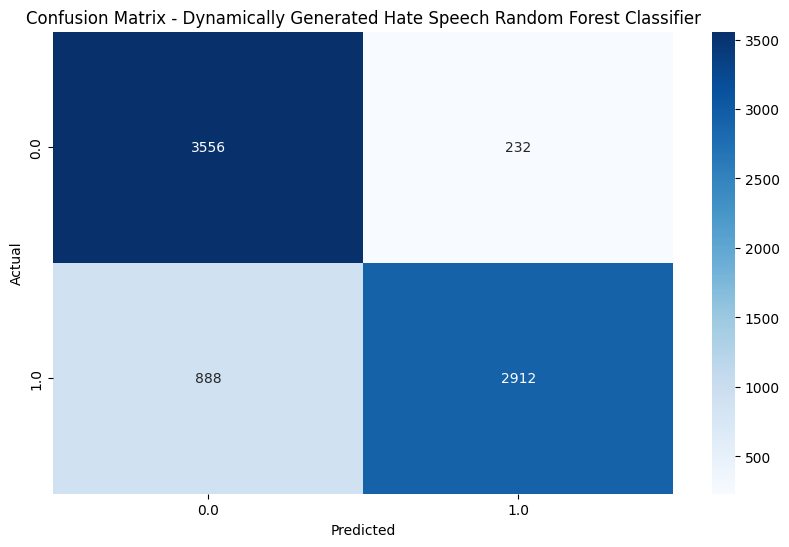

In [49]:
# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(dghs_y_test, dghs_rf_y_pred, rownames=['Actual'], colnames=['Predicted']), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Dynamically Generated Hate Speech Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [50]:
# Generate a classification report for the Random Forest Classifier on the Dynamically Generated Hate Speech dataset
dghs_rf_report = classification_report(dghs_y_test, dghs_rf_y_pred)
print("Classification Report for Dynamically Generated Hate Speech Random Forest Classifier:")
print(dghs_rf_report)

Classification Report for Dynamically Generated Hate Speech Random Forest Classifier:
              precision    recall  f1-score   support

         0.0       0.80      0.94      0.86      3788
         1.0       0.93      0.77      0.84      3800

    accuracy                           0.85      7588
   macro avg       0.86      0.85      0.85      7588
weighted avg       0.86      0.85      0.85      7588



In [51]:
# Append details to the results list
rf_classification_results_list.append((
    "Random Forest",
    "Dynamically Generated Hate Speech",
    "NA",
    "NA",
    dghs_rf_accuracy,
    dghs_rf_f1,
    0.0,
    dghs_rf_random_search.best_params_
))

In [52]:
online_abusive_attacks_y_test.value_counts()

Toxicity
0.0      347
1.0       27
2.0       14
4.0        9
6.0        9
5.0        8
3.0        7
9.0        4
13.0       4
21.0       3
11.0       3
17.0       3
14.0       2
64.0       2
7.0        2
8.0        2
25.0       2
68.0       1
266.0      1
80.0       1
36.0       1
49.0       1
466.0      1
20.0       1
50.0       1
170.0      1
23.0       1
38.0       1
24.0       1
106.0      1
129.0      1
19.0       1
157.0      1
35.0       1
16.0       1
22.0       1
Name: count, dtype: int64

In [53]:
# Random Forest Regressor pipeline for online_abusive_attacks dataset
online_abusive_attacks_rf_pipeline = Pipeline([
    ('rf_regressor', RandomForestRegressor(random_state=42))
])

# Set the parameters for Randomized Search for Random Forest Regressor on the online_abusive_attacks dataset
online_abusive_attacks_rf_param_grid = {
    'rf_regressor__n_estimators': range(1000),
    'rf_regressor__max_depth': range(1, online_abusive_attacks_log2),
    'rf_regressor__min_samples_split': [online_abusive_attacks_1_percent * i for i in range(2, 6)],
    'rf_regressor__min_samples_leaf': [online_abusive_attacks_1_percent * i for i in range(1, 6)],
    'rf_regressor__criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson']
}

In [54]:
start_time = time.time()
online_abusive_attacks_r2_scorer = make_scorer(r2_score, greater_is_better=True)

online_abusive_attacks_rf_random_search = RandomizedSearchCV(online_abusive_attacks_rf_pipeline,
                                                   param_distributions=online_abusive_attacks_rf_param_grid,
                                                   n_iter=10,
                                                   cv=online_abusive_attacks_kf,
                                                   scoring=online_abusive_attacks_r2_scorer,
                                                   random_state=42)
online_abusive_attacks_rf_random_search.fit(online_abusive_attacks_X_train, online_abusive_attacks_y_train)
end_time = time.time()
print("Best parameters for Online Abusive Attacks Random Forest Regressor:", online_abusive_attacks_rf_random_search.best_params_)
print("Best score for Online Abusive Attacks Random Forest Regressor:", online_abusive_attacks_rf_random_search.best_score_)
print("Time taken for Online Abusive Attacks Random Forest Regressor Randomized Search:", end_time - start_time)

Best parameters for Online Abusive Attacks Random Forest Regressor: {'rf_regressor__n_estimators': 958, 'rf_regressor__min_samples_split': 57, 'rf_regressor__min_samples_leaf': 19, 'rf_regressor__max_depth': 7, 'rf_regressor__criterion': 'squared_error'}
Best score for Online Abusive Attacks Random Forest Regressor: 0.25949069352759835
Time taken for Online Abusive Attacks Random Forest Regressor Randomized Search: 111.08120203018188


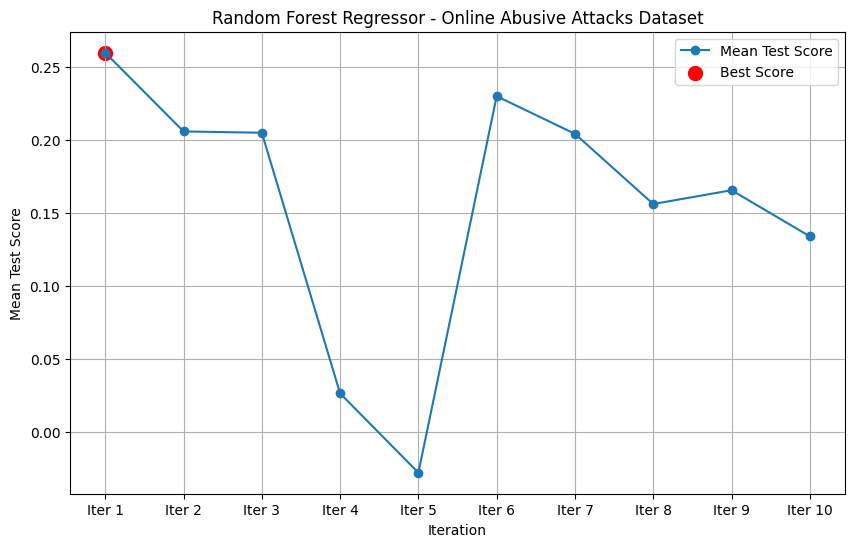

In [55]:
# Plot the accuracy scores for the Random Forest Regressor on the Online Abusive Attacks dataset for all iterations
plt.figure(figsize=(10, 6))
plt.plot(online_abusive_attacks_rf_random_search.cv_results_['mean_test_score'], marker='o', label='Mean Test Score')

# Plot the best score as a red x
online_abusive_attacks_rf_best_score_index = np.argmax(online_abusive_attacks_rf_random_search.cv_results_['mean_test_score'])
plt.scatter(online_abusive_attacks_rf_best_score_index, online_abusive_attacks_rf_random_search.cv_results_['mean_test_score'][online_abusive_attacks_rf_best_score_index], color='red', s=100, label='Best Score')

plt.title('Random Forest Regressor - Online Abusive Attacks Dataset')
plt.xlabel('Iteration')
plt.ylabel('Mean Test Score')
plt.xticks(range(len(online_abusive_attacks_rf_random_search.cv_results_['mean_test_score'])),
           [f"Iter {i+1}" for i in range(len(online_abusive_attacks_rf_random_search.cv_results_['mean_test_score']))])
plt.legend()
plt.grid()
plt.show()

In [56]:
# Predict on the test set
online_abusive_attacks_rf_y_pred = online_abusive_attacks_rf_random_search.predict(online_abusive_attacks_X_test)

In [57]:
# Evaluate the model
online_abusive_attacks_rf_r2 = r2_score(online_abusive_attacks_y_test, online_abusive_attacks_rf_y_pred)
online_abusive_attacks_rf_rmse = root_mean_squared_error(online_abusive_attacks_y_test, online_abusive_attacks_rf_y_pred)

print("Dynamically Generated Hate Speech Random Forest Regressor:")
print(f"Best Parameters: {online_abusive_attacks_rf_random_search.best_params_}")
print(f"R-squared Score: {online_abusive_attacks_rf_r2:.4f}")
print(f"RMSE Score: {online_abusive_attacks_rf_rmse:.4f}")

Dynamically Generated Hate Speech Random Forest Regressor:
Best Parameters: {'rf_regressor__n_estimators': 958, 'rf_regressor__min_samples_split': 57, 'rf_regressor__min_samples_leaf': 19, 'rf_regressor__max_depth': 7, 'rf_regressor__criterion': 'squared_error'}
R-squared Score: 0.3051
RMSE Score: 24.1944


In [58]:
# Append details to the results list
rf_regression_results_list.append((
    "Random Forest",
    "Online Abusive Attacks",
    online_abusive_attacks_rf_rmse,
    online_abusive_attacks_rf_r2,
    online_abusive_attacks_rf_random_search.best_params_
))

In [59]:
us2020hs_y_test.value_counts()

HOF
1    538
0    518
Name: count, dtype: int64

In [60]:
# Random Forest Classifier pipeline for us2020hs dataset
us2020hs_rf_pipeline = Pipeline([
    ('rf_classifier', RandomForestClassifier(random_state=42))
])

# Set the parameters for Randomized Search for Random Forest Classifier on the us2020hs dataset
us2020hs_rf_param_grid = {
    'rf_classifier__n_estimators': range(1000),
    'rf_classifier__max_depth': [us2020hs_log2],
    'rf_classifier__min_samples_split': [us2020hs_1_percent * i for i in range(2, 6)],
    'rf_classifier__min_samples_leaf': [us2020hs_1_percent * i for i in range(1, 6)],
    'rf_classifier__criterion': ['gini', 'entropy']
}

In [61]:
start_time = time.time()
us2020hs_class_scorer = make_scorer(accuracy_score, greater_is_better=True)

us2020hs_rf_random_search = RandomizedSearchCV(us2020hs_rf_pipeline,
                                                   param_distributions=us2020hs_rf_param_grid,
                                                   n_iter=10,
                                                   cv=us2020hs_kf,
                                                   scoring=us2020hs_class_scorer,
                                                   random_state=42)
us2020hs_rf_random_search.fit(us2020hs_X_train, us2020hs_y_train)
end_time = time.time()
print("Best parameters for US Elections 2020 Hate Speech Random Forest Classifier:", us2020hs_rf_random_search.best_params_)
print("Best score for US Elections 2020 Hate Speech Random Forest Classifier:", us2020hs_rf_random_search.best_score_)
print("Time taken for US Elections 2020 Hate Speech Random Forest Classifier Randomized Search:", end_time - start_time)

Best parameters for US Elections 2020 Hate Speech Random Forest Classifier: {'rf_classifier__n_estimators': 795, 'rf_classifier__min_samples_split': 215, 'rf_classifier__min_samples_leaf': 172, 'rf_classifier__max_depth': 13, 'rf_classifier__criterion': 'gini'}
Best score for US Elections 2020 Hate Speech Random Forest Classifier: 0.6747945820129562
Time taken for US Elections 2020 Hate Speech Random Forest Classifier Randomized Search: 25.53859829902649


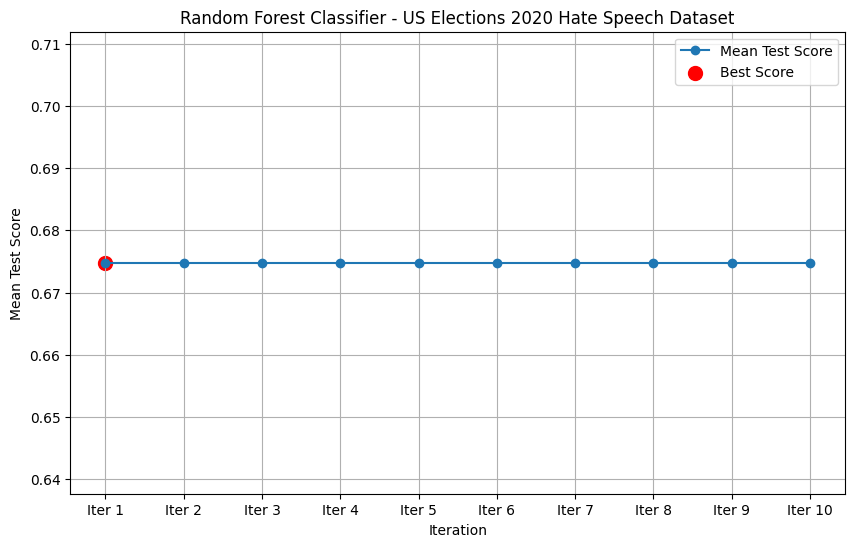

In [62]:
# Plot the accuracy scores for the Random Forest Classifier on the US Elections 2020 Hate Speech dataset for all iterations
plt.figure(figsize=(10, 6))
plt.plot(us2020hs_rf_random_search.cv_results_['mean_test_score'], marker='o', label='Mean Test Score')

# Plot the best score as a red x
us2020hs_rf_best_score_index = np.argmax(us2020hs_rf_random_search.cv_results_['mean_test_score'])
plt.scatter(us2020hs_rf_best_score_index, us2020hs_rf_random_search.cv_results_['mean_test_score'][us2020hs_rf_best_score_index], color='red', s=100, label='Best Score')

plt.title('Random Forest Classifier - US Elections 2020 Hate Speech Dataset')
plt.xlabel('Iteration')
plt.ylabel('Mean Test Score')
plt.xticks(range(len(us2020hs_rf_random_search.cv_results_['mean_test_score'])),
           [f"Iter {i+1}" for i in range(len(us2020hs_rf_random_search.cv_results_['mean_test_score']))])
plt.legend()
plt.grid()
plt.show()

In [63]:
# Predict on the test set
us2020hs_rf_y_pred = us2020hs_rf_random_search.predict(us2020hs_X_test)

In [64]:
# Evaluate the model
us2020hs_rf_accuracy = accuracy_score(us2020hs_y_test, us2020hs_rf_y_pred)
us2020hs_rf_f1 = f1_score(us2020hs_y_test, us2020hs_rf_y_pred, average='weighted')

print("US Elections 2020 Hate Speech Random Forest Classifier:")
print(f"Best Parameters: {us2020hs_rf_random_search.best_params_}")
print(f"Accuracy: {us2020hs_rf_accuracy:.4f}")
print(f"F1 Score: {us2020hs_rf_f1:.4f}")

US Elections 2020 Hate Speech Random Forest Classifier:
Best Parameters: {'rf_classifier__n_estimators': 795, 'rf_classifier__min_samples_split': 215, 'rf_classifier__min_samples_leaf': 172, 'rf_classifier__max_depth': 13, 'rf_classifier__criterion': 'gini'}
Accuracy: 0.7036
F1 Score: 0.7026


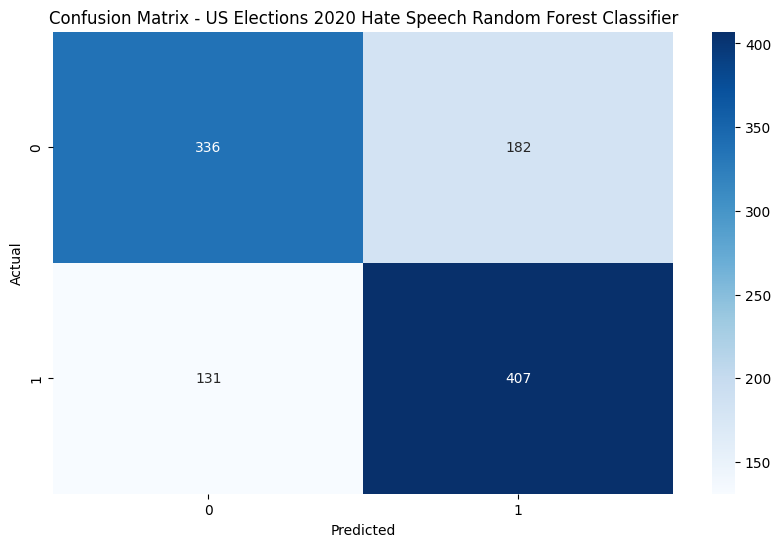

In [65]:
# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(us2020hs_y_test, us2020hs_rf_y_pred, rownames=['Actual'], colnames=['Predicted']), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - US Elections 2020 Hate Speech Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [66]:
# Generate a classification report for the Random Forest Classifier on the US Elections 2020 Hate Speech
us2020hs_rf_report = classification_report(us2020hs_y_test, us2020hs_rf_y_pred)
print("Classification Report for US Elections 2020 Hate Speech Random Forest Classifier:")
print(us2020hs_rf_report)

Classification Report for US Elections 2020 Hate Speech Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.72      0.65      0.68       518
           1       0.69      0.76      0.72       538

    accuracy                           0.70      1056
   macro avg       0.71      0.70      0.70      1056
weighted avg       0.70      0.70      0.70      1056



In [67]:
# Append details to the results list
rf_classification_results_list.append((
    "Random Forest",
    "US Elections 2020 Hate Speech",
    "NA",
    "NA",
    us2020hs_rf_accuracy,
    us2020hs_rf_f1,
    0.0,
    us2020hs_rf_random_search.best_params_
))

In [68]:
mlma_hate_speech_y_test.value_counts()

target_groups
1    2115
0     834
2     628
3      89
Name: count, dtype: int64

In [69]:
# Random Forest Classifier pipeline for mlma_hate_speech dataset
mlma_hate_speech_rf_pipeline = Pipeline([
    ('rf_classifier', RandomForestClassifier(random_state=42))
])

# Set the parameters for Randomized Search for Random Forest Classifier on the mlma_hate_speech dataset
mlma_hate_speech_rf_param_grid = {
    'rf_classifier__n_estimators': range(1000),
    'rf_classifier__max_depth': [mlma_hate_speech_sample_log2],
    'rf_classifier__min_samples_split': [mlma_hate_speech_sample_1_percent * i for i in range(2, 6)],
    'rf_classifier__min_samples_leaf': [mlma_hate_speech_sample_1_percent * i for i in range(1, 6)],
    'rf_classifier__criterion': ['gini', 'entropy']
}

In [70]:
start_time = time.time()
mlma_hate_speech_class_scorer = make_scorer(accuracy_score, greater_is_better=True)

mlma_hate_speech_rf_random_search = RandomizedSearchCV(mlma_hate_speech_rf_pipeline,
                                                   param_distributions=mlma_hate_speech_rf_param_grid,
                                                   n_iter=10,
                                                   cv=mlma_hate_speech_kf,
                                                   scoring=mlma_hate_speech_class_scorer,
                                                   random_state=42)
mlma_hate_speech_rf_random_search.fit(mlma_hate_speech_X_train_sample, mlma_hate_speech_y_train_sample)
end_time = time.time()
print("Best parameters for US Elections 2020 Hate Speech Random Forest Classifier:", mlma_hate_speech_rf_random_search.best_params_)
print("Best score for US Elections 2020 Hate Speech Random Forest Classifier:", mlma_hate_speech_rf_random_search.best_score_)
print("Time taken for US Elections 2020 Hate Speech Random Forest Classifier Randomized Search:", end_time - start_time)

Best parameters for US Elections 2020 Hate Speech Random Forest Classifier: {'rf_classifier__n_estimators': 962, 'rf_classifier__min_samples_split': 132, 'rf_classifier__min_samples_leaf': 44, 'rf_classifier__max_depth': 13, 'rf_classifier__criterion': 'entropy'}
Best score for US Elections 2020 Hate Speech Random Forest Classifier: 0.5991348639983451
Time taken for US Elections 2020 Hate Speech Random Forest Classifier Randomized Search: 37.31710505485535


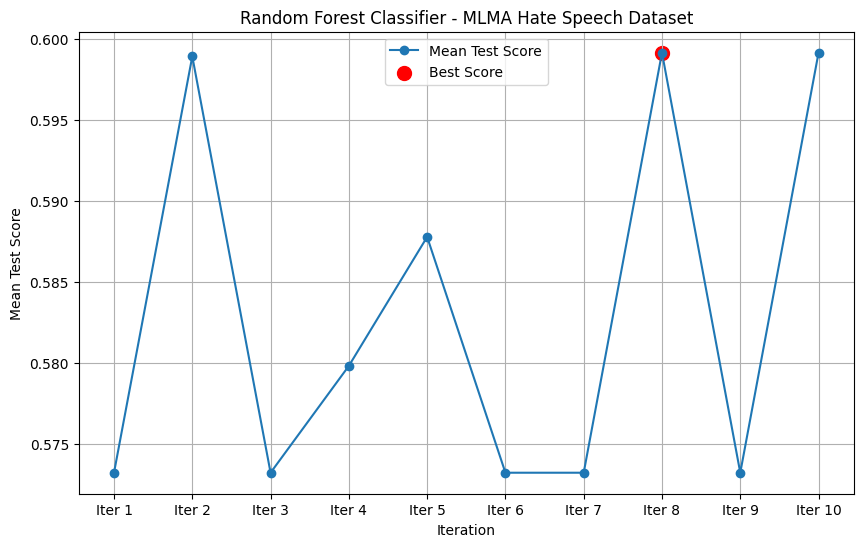

In [71]:
# Plot the accuracy scores for the Random Forest Classifier on the MLMA Hate Speech dataset for all iterations
plt.figure(figsize=(10, 6))
plt.plot(mlma_hate_speech_rf_random_search.cv_results_['mean_test_score'], marker='o', label='Mean Test Score')

# Plot the best score as a red x
mlma_hate_speech_rf_best_score_index = np.argmax(mlma_hate_speech_rf_random_search.cv_results_['mean_test_score'])
plt.scatter(mlma_hate_speech_rf_best_score_index, mlma_hate_speech_rf_random_search.cv_results_['mean_test_score'][mlma_hate_speech_rf_best_score_index], color='red', s=100, label='Best Score')

plt.title('Random Forest Classifier - MLMA Hate Speech Dataset')
plt.xlabel('Iteration')
plt.ylabel('Mean Test Score')
plt.xticks(range(len(mlma_hate_speech_rf_random_search.cv_results_['mean_test_score'])),
           [f"Iter {i+1}" for i in range(len(mlma_hate_speech_rf_random_search.cv_results_['mean_test_score']))])
plt.legend()
plt.grid()
plt.show()

In [72]:
# Predict on the test set
mlma_hate_speech_rf_y_pred = mlma_hate_speech_rf_random_search.predict(mlma_hate_speech_X_test)

In [73]:
# Evaluate the model
mlma_hate_speech_rf_accuracy = accuracy_score(mlma_hate_speech_y_test, mlma_hate_speech_rf_y_pred)
mlma_hate_speech_rf_f1 = f1_score(mlma_hate_speech_y_test, mlma_hate_speech_rf_y_pred, average='weighted')

print("MLMA Hate Speech Random Forest Classifier:")
print(f"Best Parameters: {mlma_hate_speech_rf_random_search.best_params_}")
print(f"Accuracy: {mlma_hate_speech_rf_accuracy:.4f}")
print(f"F1 Score: {mlma_hate_speech_rf_f1:.4f}")

MLMA Hate Speech Random Forest Classifier:
Best Parameters: {'rf_classifier__n_estimators': 962, 'rf_classifier__min_samples_split': 132, 'rf_classifier__min_samples_leaf': 44, 'rf_classifier__max_depth': 13, 'rf_classifier__criterion': 'entropy'}
Accuracy: 0.5993
F1 Score: 0.4913


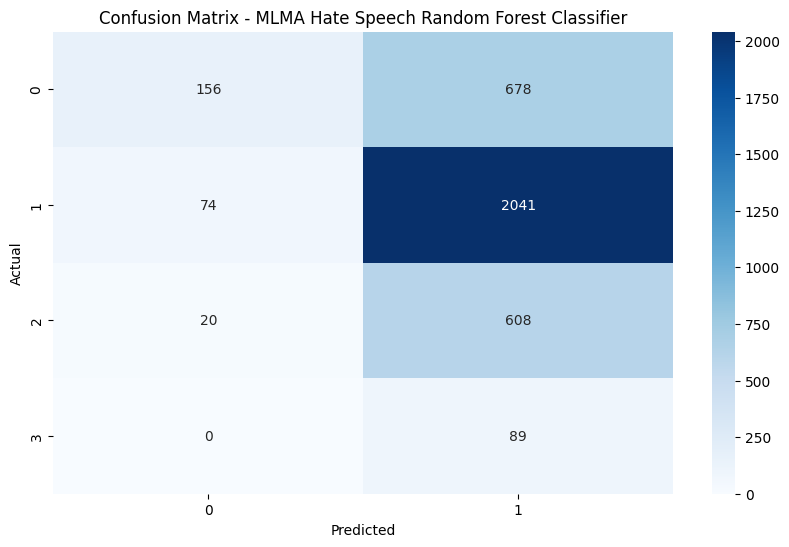

In [74]:
# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(mlma_hate_speech_y_test, mlma_hate_speech_rf_y_pred, rownames=['Actual'], colnames=['Predicted']), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - MLMA Hate Speech Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [75]:
# Generate a classification report for the Random Forest Classifier on the MLMA Hate Speech
mlma_hate_speech_rf_report = classification_report(mlma_hate_speech_y_test, mlma_hate_speech_rf_y_pred)
print("Classification Report for MLMA Hate Speech Random Forest Classifier:")
print(mlma_hate_speech_rf_report)

Classification Report for MLMA Hate Speech Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.62      0.19      0.29       834
           1       0.60      0.97      0.74      2115
           2       0.00      0.00      0.00       628
           3       0.00      0.00      0.00        89

    accuracy                           0.60      3666
   macro avg       0.31      0.29      0.26      3666
weighted avg       0.49      0.60      0.49      3666



In [76]:
# Append details to the results list
rf_classification_results_list.append((
    "Random Forest",
    "MLMA Hate Speech",
    "NA",
    "NA",
    mlma_hate_speech_rf_accuracy,
    mlma_hate_speech_rf_f1,
    0.0,
    mlma_hate_speech_rf_random_search.best_params_
))

## Support Vector Machine Conclusions

In [77]:
rf_regression_results_list

[('Random Forest',
  'Online Abusive Attacks',
  24.19443595764069,
  0.3051090830231068,
  {'rf_regressor__n_estimators': 958,
   'rf_regressor__min_samples_split': 57,
   'rf_regressor__min_samples_leaf': 19,
   'rf_regressor__max_depth': 7,
   'rf_regressor__criterion': 'squared_error'})]

In [78]:
rf_classification_results_list

[('Random Forest',
  'Convabuse',
  'NA',
  'NA',
  0.6195587358378056,
  0.6201601612132759,
  0.0,
  {'rf_classifier__n_estimators': 958,
   'rf_classifier__min_samples_split': 606,
   'rf_classifier__min_samples_leaf': 202,
   'rf_classifier__max_depth': 7,
   'rf_classifier__criterion': 'gini'}),
 ('Random Forest',
  'Dynamically Generated Hate Speech',
  'NA',
  'NA',
  0.8523985239852399,
  0.8513076732384929,
  0.0,
  {'rf_classifier__n_estimators': 958,
   'rf_classifier__min_samples_split': 912,
   'rf_classifier__min_samples_leaf': 304,
   'rf_classifier__max_depth': 7,
   'rf_classifier__criterion': 'gini'}),
 ('Random Forest',
  'US Elections 2020 Hate Speech',
  'NA',
  'NA',
  0.7035984848484849,
  0.7026316577874102,
  0.0,
  {'rf_classifier__n_estimators': 795,
   'rf_classifier__min_samples_split': 215,
   'rf_classifier__min_samples_leaf': 172,
   'rf_classifier__max_depth': 13,
   'rf_classifier__criterion': 'gini'}),
 ('Random Forest',
  'MLMA Hate Speech',
  'NA',


In [79]:
# Convert the rf_classification_results_list to a DataFrame
rf_classification_summary = pd.DataFrame(rf_classification_results_list, columns=["Model", "Dataset", "Kernel", "Regularization", "Accuracy", "F1-score", "Ratio", "Best Parameters"])
rf_classification_summary

,Model,Dataset,Kernel,Regularization,Accuracy,F1-score,Ratio,Best Parameters
0,Random Forest,Convabuse,NA,NA,0.619559,0.620160,0.0,"{'rf_classifier__n_estimators': 958, 'rf_class..."
1,Random Forest,Dynamically Generated Hate Speech,NA,NA,0.852399,0.851308,0.0,"{'rf_classifier__n_estimators': 958, 'rf_class..."
2,Random Forest,US Elections 2020 Hate Speech,NA,NA,0.703598,0.702632,0.0,"{'rf_classifier__n_estimators': 795, 'rf_class..."
3,Random Forest,MLMA Hate Speech,NA,NA,0.599291,0.491260,0.0,"{'rf_classifier__n_estimators': 962, 'rf_class..."


In [80]:
# Convert the rf_regression_results_list to a DataFrame
rf_regression_summary = pd.DataFrame(rf_regression_results_list, columns=["Model", "Dataset", "RMSE", "R2", "Best Parameters"])
rf_regression_summary

,Model,Dataset,RMSE,R2,Best Parameters
0,Random Forest,Online Abusive Attacks,24.194436,0.305109,"{'rf_regressor__n_estimators': 958, 'rf_regres..."


In [81]:
output_path = 'results/'
rf_classification_summary.to_csv(f"{output_path}/model6_rf-classification-summary.csv", index=False)
rf_regression_summary.to_csv(f"{output_path}/model6_rf-regression-summary.csv", index=False)